In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Load the image and grayscale conversion
A = imread('dog.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale
print(X.shape)

(2000, 1500)


In [11]:
# Taking the SVD of the image
U, S, VT = np.linalg.svd(X,full_matrices=True)
S = np.diag(S)
U.shape

(2000, 2000)

In [12]:
a,b=X.shape

<function matplotlib.pyplot.show(close=None, block=None)>

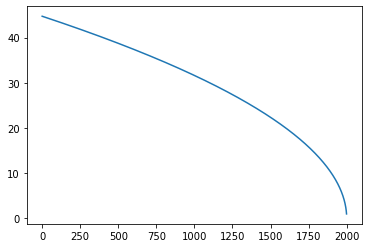

In [14]:
# Plot norm of the error
x = []
y = []

for m in range(a):
    x.append(m)
    y.append(np.linalg.norm((U[:,:m] @ U[:,:m].T.conj()) - np.identity(a)))

plt.plot(np.array(x), np.array(y))
plt.show

In [ ]:
x_point = []
y_point = []

for b in range(m):
  x_point.append(b)
  y_point.append(np.linalg.norm((U[:,:b] @ U[:,:b].T.conj()) - np.identity(m)))

plt.plot(np.array(x_point), np.array(y_point))
plt.show

In [53]:
U.T.dot(U)

array([[ 1.00000000e+00, -1.38777878e-16,  4.02455846e-16, ...,
        -4.22838847e-17, -6.63531730e-17, -2.73218947e-17],
       [-1.38777878e-16,  1.00000000e+00, -3.52148866e-16, ...,
        -8.78203760e-18,  4.33680869e-17, -4.09828421e-17],
       [ 4.02455846e-16, -3.52148866e-16,  1.00000000e+00, ...,
         9.36750677e-17,  6.11490025e-17,  6.57026517e-17],
       ...,
       [-4.22838847e-17, -8.78203760e-18,  9.36750677e-17, ...,
         1.00000000e+00, -8.32667268e-17,  3.46944695e-18],
       [-6.63531730e-17,  4.33680869e-17,  6.11490025e-17, ...,
        -8.32667268e-17,  1.00000000e+00, -5.55111512e-17],
       [-2.73218947e-17, -4.09828421e-17,  6.57026517e-17, ...,
         3.46944695e-18, -5.55111512e-17,  1.00000000e+00]])

In [59]:
(U*U.T).sum(axis=0)

array([-0.00224939,  0.00205086, -0.03835123, ...,  0.30451871,
        0.26776135,  0.14898415])

In [60]:
(U*U.T).sum(axis=1)

array([-0.00224939,  0.00205086, -0.03835123, ...,  0.30451871,
        0.26776135,  0.14898415])

(2000, 1500)


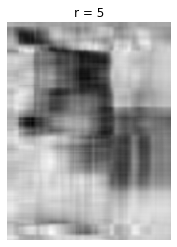

In [51]:
r= 5 #choosing r less than m=2000

Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]


print(Xapprox.shape)

img = plt.imshow(Xapprox)
img.set_cmap('gray')
plt.axis('off')
plt.title('r = ' + str(r))
plt.show()

In [58]:
U[:,:r].shape

(2000, 5)

In [54]:
U_new, S_new, VT_new = np.linalg.svd(Xapprox,full_matrices=True)

In [55]:
U_new.dot(U_new.T)

array([[ 1.00000000e+00,  9.11356418e-16, -3.43037544e-16, ...,
        -1.92445886e-18,  2.33238992e-17,  2.57498016e-18],
       [ 9.11356418e-16,  1.00000000e+00, -3.75184774e-16, ...,
         2.22642610e-17,  2.65290719e-17,  2.97342446e-17],
       [-3.43037544e-16, -3.75184774e-16,  1.00000000e+00, ...,
        -1.29731566e-17, -4.42896587e-17, -4.55907014e-17],
       ...,
       [-1.92445886e-18,  2.22642610e-17, -1.29731566e-17, ...,
         1.00000000e+00, -3.46944695e-17, -7.80625564e-18],
       [ 2.33238992e-17,  2.65290719e-17, -4.42896587e-17, ...,
        -3.46944695e-17,  1.00000000e+00, -1.21430643e-17],
       [ 2.57498016e-18,  2.97342446e-17, -4.55907014e-17, ...,
        -7.80625564e-18, -1.21430643e-17,  1.00000000e+00]])

In [56]:
U_new.T.dot(U_new)

array([[ 1.00000000e+00,  6.93889390e-18, -4.54497551e-16, ...,
        -1.56125113e-17, -3.36102673e-18,  2.42861287e-17],
       [ 6.93889390e-18,  1.00000000e+00,  3.29597460e-16, ...,
        -7.80625564e-18, -2.29850861e-17,  3.29597460e-17],
       [-4.54497551e-16,  3.29597460e-16,  1.00000000e+00, ...,
         6.93889390e-18,  3.03576608e-17,  3.03576608e-17],
       ...,
       [-1.56125113e-17, -7.80625564e-18,  6.93889390e-18, ...,
         1.00000000e+00, -2.08166817e-17,  4.16333634e-17],
       [-3.36102673e-18, -2.29850861e-17,  3.03576608e-17, ...,
        -2.08166817e-17,  1.00000000e+00, -3.20923843e-17],
       [ 2.42861287e-17,  3.29597460e-17,  3.03576608e-17, ...,
         4.16333634e-17, -3.20923843e-17,  1.00000000e+00]])

In [40]:
rank = np.linalg.matrix_rank(Xapprox)
print("Rank of the given Matrix is : ",rank)

Rank of the given Matrix is :  5


In [44]:
# Correlation matrix U∗U is formed by taking the inner product of columns of U.
(U_new*U_new).sum(axis=0)


array([1., 1., 1., ..., 1., 1., 1.])

In [45]:
# Correlation matrix UU* is formed by taking the inner product of ROWS of U.
U_row = (U_new*U_new).sum(axis=1)
U_row

array([1., 1., 1., ..., 1., 1., 1.])

In [21]:
#Build a nxn identity matrix
I = np.identity(1500)
I

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [46]:
np.linalg.norm(X-Xapprox)

50746.447720034615